## 我们使用一个脑部病变数据集作为范例

In [ ]:
!kaggle datasets download -d mateuszbuda/lgg-mri-segmentation

In [1]:
!unzip lgg-mri-segmentation.zip

Archive:  lgg-mri-segmentation.zip
  inflating: kaggle_3m/README.md     
  inflating: kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_1.tif  
  inflating: kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_10.tif  
  inflating: kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_10_mask.tif  
  inflating: kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_11.tif  
  inflating: kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_11_mask.tif  
  inflating: kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_12.tif  
  inflating: kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_12_mask.tif  
  inflating: kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_13.tif  
  inflating: kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_13_mask.tif  
  inflating: kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_14.tif  
  inflating: kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_14_mask.tif  
  inflating: kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_

## 如何了解数据的情况

我们可以粗略的看到`lgg-mri-segmentation/kaggle_3m/TCGA_CS_4941_19960909`内含有这样两个图像文件:

`lgg-mri-segmentation/kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_1_mask.tif`

`lgg-mri-segmentation/kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_1.tif`

在这个文件夹中还有很多对tif文件，他们结尾的序号不一

根据直觉，他们肯定是一整个volume文件中的不同slice/切片

我们先看看其中一对

你可以任意修改`image_path`和`mask_path`来浏览

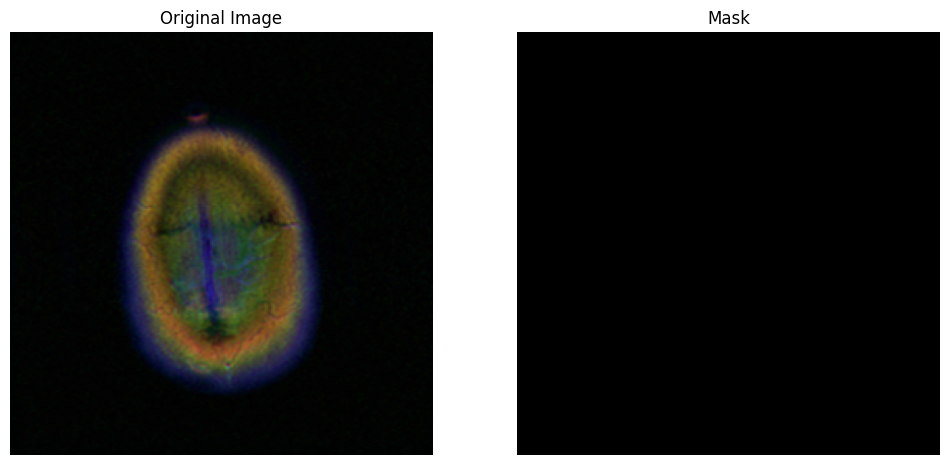

In [6]:
import matplotlib.pyplot as plt
from PIL import Image

# 读取图像和掩膜
image_path = 'lgg-mri-segmentation/kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_22.tif'
mask_path = 'lgg-mri-segmentation/kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_22_mask.tif'

image = Image.open(image_path)
mask = Image.open(mask_path)

# 创建可视化
plt.figure(figsize=(12, 6))

# 显示原始图像
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# 显示掩膜
plt.subplot(1, 2, 2)
plt.imshow(mask, cmap='gray')
plt.title('Mask')
plt.axis('off')

plt.show()


根据这些关系，我们最好将这些图放在一起来看看，来确认他们是不是连续的影像

In [ ]:
import os
import re

def get_slices_and_masks(folder_path):
    slice_list = []
    mask_list = []

    # 正则表达式，用于提取文件名中的序号
    def extract_number(file_name):
        match = re.search(r'_(\d+)\.tif$', file_name)
        return int(match.group(1)) if match else -1

    # 遍历文件夹中的所有文件，并按序号排序
    for file_name in sorted(os.listdir(folder_path), key=extract_number):
        if file_name.endswith('.tif') and '_mask' not in file_name:
            # 获取切片路径
            slice_path = os.path.join(folder_path, file_name)
            slice_list.append(slice_path)

            # 获取对应的掩膜文件路径
            base_name = file_name.replace('.tif', '')
            mask_file_name = base_name + '_mask.tif'
            mask_path = os.path.join(folder_path, mask_file_name)
            
            if os.path.exists(mask_path):
                mask_list.append(mask_path)
            else:
                print(f"Mask not found for {file_name}")
    
    return slice_list, mask_list

folder_path = 'lgg-mri-segmentation/kaggle_3m/TCGA_CS_4941_19960909'
slices, masks = get_slices_and_masks(folder_path)

print("Slices:", slices)
print("Masks:", masks)
print("Length of slices:", len(slices))
print("Length of masks:", len(masks))


Slices: ['lgg-mri-segmentation/kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_1.tif', 'lgg-mri-segmentation/kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_2.tif', 'lgg-mri-segmentation/kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_3.tif', 'lgg-mri-segmentation/kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_4.tif', 'lgg-mri-segmentation/kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_5.tif', 'lgg-mri-segmentation/kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_6.tif', 'lgg-mri-segmentation/kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_7.tif', 'lgg-mri-segmentation/kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_8.tif', 'lgg-mri-segmentation/kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_9.tif', 'lgg-mri-segmentation/kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_10.tif', 'lgg-mri-segmentation/kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_11.tif', 'lgg-mri-segmentation/kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_494

通常，我会检查图像的数据类型、RGB通道、大小、维度、最大最小值

对掩码图像，我还会检查独特值

这都关乎如何进行之后的数据加载

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import ipywidgets as widgets
from IPython.display import display

# 打印图像信息
def print_image_info(image, is_mask=False):
    image_array = np.array(image)
    print(f"数据类型: {image_array.dtype}")
    print(f"大小: {image.size}")  # PIL Image 的 size 返回的是 (width, height)
    print(f"维度: {image_array.shape}")
    print(f"最大值: {image_array.max()}")
    print(f"最小值: {image_array.min()}")

    # 如果是掩码图像，检查独特值
    if is_mask:
        unique_values = np.unique(image_array)
        print(f"独特值: {unique_values}")

    # 检查图像的通道情况
    if len(image_array.shape) == 3:
        if image_array.shape[2] == 3:
            print("图像是RGB通道，3个通道")
        elif image_array.shape[2] == 1:
            print("图像是单通道灰度图像")
        else:
            print(f"图像具有{image_array.shape[2]}个通道（非标准RGB图像）")
    elif len(image_array.shape) == 2:
        print("图像是灰度图像，只有1个通道")
    else:
        print(f"图像具有不常见的维度: {image_array.shape}")
    print("")
    



# 可视化函数
def visualize_slice(slice_list, mask_list, z):
    # 读取切片和掩膜
    slice_image = Image.open(slice_list[z])
    mask_image = Image.open(mask_list[z])
    
    # 打印图像和掩膜信息
    print(f"第 {z} 张切片信息:")
    print_image_info(slice_image)
    print(f"第 {z} 张掩膜信息:")
    print_image_info(mask_image, is_mask=True)
    
    # 创建可视化
    plt.figure(figsize=(12, 6))

    # 显示原始图像
    plt.subplot(1, 2, 1)
    plt.imshow(slice_image, cmap='gray')
    plt.title(f'Original Slice {z}')
    plt.axis('off')

    # 显示掩膜
    plt.subplot(1, 2, 2)
    plt.imshow(mask_image, cmap='gray')
    plt.title(f'Mask {z}')
    plt.axis('off')

    plt.show()

# 数据（来自之前的函数生成的 slices 和 masks 列表）
slices, masks = get_slices_and_masks(folder_path)

# 滑动条的设置，最大值设为图像数量减1
z_slider = widgets.IntSlider(min=0, max=len(slices)-1, step=1, description='Z Axis')

# 使用滑动条控制可视化和打印图像信息
widgets.interactive(visualize_slice, slice_list=widgets.fixed(slices), mask_list=widgets.fixed(masks), z=z_slider)


interactive(children=(IntSlider(value=0, description='Z Axis', max=22), Output()), _dom_classes=('widget-inter…

当然，我们还得看看别的文件夹如何。在这里，我选择查看其它文件夹有多少对图像-掩码

In [12]:
import os

# 指定根文件夹路径
root_folder = 'lgg-mri-segmentation/kaggle_3m'

total_slices = 0
total_masks = 0

# 遍历根文件夹下的所有子文件夹
for sub_folder in os.listdir(root_folder):
    sub_folder_path = os.path.join(root_folder, sub_folder)

    # 检查是否为文件夹
    if os.path.isdir(sub_folder_path):
        slice_count = 0
        mask_count = 0
        
        # 遍历子文件夹中的所有文件
        for file_name in os.listdir(sub_folder_path):
            if file_name.endswith('.tif') and '_mask' not in file_name:
                slice_count += 1
                base_name = file_name.replace('.tif', '')
                mask_file_name = base_name + '_mask.tif'
                mask_path = os.path.join(sub_folder_path, mask_file_name)

                if os.path.exists(mask_path):
                    mask_count += 1
        
        # 打印子文件夹的切片和掩膜数量
        print(f"Folder: {sub_folder} -> Slices: {slice_count}, Masks: {mask_count}")
        
        total_slices += slice_count
        total_masks += mask_count

# 打印总计
print(f"Total Slices: {total_slices}")
print(f"Total Masks: {total_masks}")


Folder: TCGA_HT_8105_19980826 -> Slices: 32, Masks: 32
Folder: TCGA_HT_7694_19950404 -> Slices: 21, Masks: 21
Folder: TCGA_DU_A5TY_19970709 -> Slices: 36, Masks: 36
Folder: TCGA_CS_5397_20010315 -> Slices: 22, Masks: 22
Folder: TCGA_HT_7686_19950629 -> Slices: 20, Masks: 20
Folder: TCGA_DU_7302_19911203 -> Slices: 36, Masks: 36
Folder: TCGA_DU_8163_19961119 -> Slices: 37, Masks: 37
Folder: TCGA_CS_4941_19960909 -> Slices: 23, Masks: 23
Folder: TCGA_CS_6668_20011025 -> Slices: 28, Masks: 28
Folder: TCGA_HT_A61A_20000127 -> Slices: 88, Masks: 88
Folder: TCGA_HT_8114_19981030 -> Slices: 22, Masks: 22
Folder: TCGA_DU_6405_19851005 -> Slices: 60, Masks: 60
Folder: TCGA_EZ_7264_20010816 -> Slices: 24, Masks: 24
Folder: TCGA_DU_7013_19860523 -> Slices: 49, Masks: 49
Folder: TCGA_DU_7299_19910417 -> Slices: 36, Masks: 36
Folder: TCGA_DU_6404_19850629 -> Slices: 53, Masks: 53
Folder: TCGA_DU_5852_19950709 -> Slices: 36, Masks: 36
Folder: TCGA_HT_8018_19970411 -> Slices: 20, Masks: 20
Folder: TC

基本上都没有过百的、特别巨量的数据

确认无误之后，我们就开始想想怎么搭建dataset和dataloader, in [train.ipynb](train.ipynb)

---

## 2024/11/04
我查看了训练预测数据，发现一团乱麻，最终排除到可能是数据问题，我决定将原有的3通道数据转换为1通道灰度图

In [3]:
import os
from tqdm.auto import tqdm
from PIL import Image

# 指定根文件夹路径
root_folder = 'lgg-mri-segmentation/kaggle_3m'


# 遍历根文件夹下的所有子文件夹
for sub_folder in tqdm(os.listdir(root_folder)):
    sub_folder_path = os.path.join(root_folder, sub_folder)
    # 检查是否为文件夹
    if os.path.isdir(sub_folder_path):
        # 遍历子文件夹中的所有文件
        for file_name in os.listdir(sub_folder_path):
            if file_name.endswith('.tif') and '_mask' not in file_name:
                file_path = os.path.join(sub_folder_path, file_name)
                # 打开图像文件
                img = Image.open(file_path)
                # 将图像转换为灰度图
                img_gray = img.convert('L')
                # 保存灰度图
                img_gray.save(file_path)
                # print(f"Converted {file_path} to grayscale")


  0%|          | 0/113 [00:00<?, ?it/s]

Converted lgg-mri-segmentation/kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_1.tif to grayscale
Converted lgg-mri-segmentation/kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_10.tif to grayscale
Converted lgg-mri-segmentation/kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_11.tif to grayscale
Converted lgg-mri-segmentation/kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_12.tif to grayscale
Converted lgg-mri-segmentation/kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_13.tif to grayscale
Converted lgg-mri-segmentation/kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_14.tif to grayscale
Converted lgg-mri-segmentation/kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_15.tif to grayscale
Converted lgg-mri-segmentation/kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_16.tif to grayscale
Converted lgg-mri-segmentation/kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_17.tif to grayscale
Converted lgg-mri-segmentation/kaggle_3m/TCGA_CS_4941_19